# Ejercicio 1: Análisis Exploratorio de Datos (EDA) de Ofertas Relámpago

*Tobias Pucci Romero*

### Objetivo
Realizar un análisis exploratorio de las ofertas relámpago para generar insights valiosos sobre su comportamiento y características.

### Contexto
Se nos proporciona un archivo CSV (ofertas_relampago.csv) que contiene información detallada sobre ofertas relámpago realizadas en un período específico y país determinado. 

Estas ofertas se caracterizan por:
- Tener una duración limitada (algunas horas)
- Contar con un stock específico comprometido  
- Ser parte de una estrategia comercial especial

### Alcance del Análisis
- Explorar patrones temporales en las ofertas
- Analizar el comportamiento de ventas
- Identificar factores de éxito
- Examinar la relación entre variables clave
- Detectar oportunidades de mejora

### Entregable
Jupyter Notebook con el análisis exploratorio completo, incluyendo:
- Visualizaciones relevantes
- Insights descubiertos
- Conclusiones principales
- Recomendaciones basadas en datos

### Instalacion e imports de librerias

In [ ]:
!pip install pandas seaborn matplotlib numpy workalendar
%matplotlib inline

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

#apagar los warnings de pandas
import warnings
warnings.filterwarnings('ignore')


### Análisis inicial de los datos:

In [3]:
df = pd.read_csv('ofertas_relampago.csv')
df.head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OFFER_START_DATE           48746 non-null  object 
 1   OFFER_START_DTTM           48746 non-null  object 
 2   OFFER_FINISH_DTTM          48746 non-null  object 
 3   OFFER_TYPE                 48746 non-null  object 
 4   INVOLVED_STOCK             48746 non-null  int64  
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64  
 6   SOLD_AMOUNT                24579 non-null  float64
 7   SOLD_QUANTITY              24579 non-null  float64
 8   ORIGIN                     11316 non-null  object 
 9   SHIPPING_PAYMENT_TYPE      48746 non-null  object 
 10  DOM_DOMAIN_AGG1            48746 non-null  object 
 11  VERTICAL                   48746 non-null  object 
 12  DOMAIN_ID                  48746 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usag

In [5]:
df.describe()

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY
count,48746.000000,48746.000000,24579.000000,24579.000000
mean,35.007508,30.565216,51.208898,10.851052
std,206.761058,195.813806,175.254414,45.475305
min,1.000000,-192.000000,0.280000,1.000000
25%,5.000000,4.000000,5.730000,1.000000
50%,10.000000,8.000000,12.420000,3.000000
75%,15.000000,15.000000,30.925000,6.000000
max,9000.000000,8635.000000,4836.570000,1646.000000


In [6]:
# Dimensiones del dataset (filas x columnas)
print("Dimensiones del dataset:")
print(df.shape)
print("\n")

# Cantidad de valores nulos por columna
print("Valores nulos por columna:")
print(df.isnull().sum())
print("\n")

# Cantidad de filas duplicadas
print("Cantidad de filas duplicadas:")
print(df.duplicated().sum())

Dimensiones del dataset:
(48746, 13)


Valores nulos por columna:
OFFER_START_DATE                 0
OFFER_START_DTTM                 0
OFFER_FINISH_DTTM                0
OFFER_TYPE                       0
INVOLVED_STOCK                   0
REMAINING_STOCK_AFTER_END        0
SOLD_AMOUNT                  24167
SOLD_QUANTITY                24167
ORIGIN                       37430
SHIPPING_PAYMENT_TYPE            0
DOM_DOMAIN_AGG1                  0
VERTICAL                         0
DOMAIN_ID                        0
dtype: int64


Cantidad de filas duplicadas:
926


In [7]:
#Cantidad de categorias por columna categorica
df.select_dtypes(include=['object']).nunique()

OFFER_START_DATE           61
OFFER_START_DTTM          783
OFFER_FINISH_DTTM        7578
OFFER_TYPE                  1
ORIGIN                      1
SHIPPING_PAYMENT_TYPE       2
DOM_DOMAIN_AGG1            36
VERTICAL                    9
DOMAIN_ID                1266
dtype: int64

In [8]:
#Podemos eliminar offer type, porque no aporta informacion relevante
df = df.drop(columns=['OFFER_TYPE'])

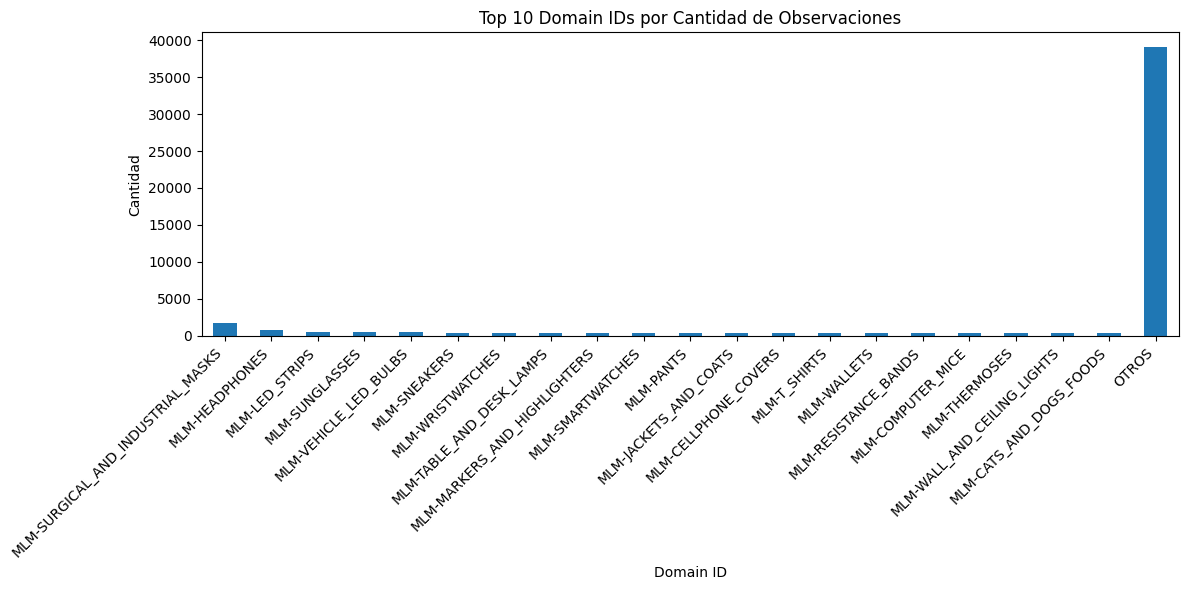

In [9]:
# Vemos que tenemos muchos domain_id distintos va a ser dificil de observar tal cantidad de categorias
# Agrupamos los 20 más frecuentes y el resto en "Otros"
top_10_domains = df["DOMAIN_ID"].value_counts().nlargest(20)
otros = pd.Series({'OTROS': df["DOMAIN_ID"].value_counts()[20:].sum()})
domain_counts = pd.concat([top_10_domains, otros])

plt.figure(figsize=(12,6))
domain_counts.plot(kind='bar')
plt.title('Top 10 Domain IDs por Cantidad de Observaciones')
plt.xlabel('Domain ID')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Como podemos ver, la gran mayoria sigue estando en la categoria otros por lo que agruparlos por domain_id no sera de ayuda en el analisis. Para eso utilizaremos la columna DOM_DOMAIN_AGG1 que ya contiene una agrupacion de domains en 36 categorias.

### Limpieza y preparación de datos:


In [10]:
#Veamos las filas duplicadas

# 1. Ver las filas que están duplicadas (mostrando todas las ocurrencias)
print("Filas duplicadas (incluyendo todas las ocurrencias):")
duplicadas = df[df.duplicated(keep=False)]

duplicadas.head()

Filas duplicadas (incluyendo todas las ocurrencias):


,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
54,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 21:00:00+00:00,20,20,NaN,NaN,A,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-KITCHEN_COOKWARE_SETS
60,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 21:00:00+00:00,20,20,NaN,NaN,A,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-KITCHEN_COOKWARE_SETS
75,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-23 00:00:00+00:00,7,7,NaN,NaN,A,free_shipping,PETS FOOD,CPG,MLM-CATS_AND_DOGS_FOODS
78,2021-06-22,2021-06-22 15:00:00+00:00,2021-06-22 23:00:01+00:00,3,3,NaN,NaN,A,free_shipping,PETS FOOD,CPG,MLM-CATS_AND_DOGS_FOODS
81,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-23 00:00:00+00:00,5,5,NaN,NaN,A,free_shipping,PETS FOOD,CPG,MLM-CATS_AND_DOGS_FOODS


In [11]:
df.shape

(48746, 12)

En este caso, no podemos asegurar que la oferta no fuera de dos productos distintos en el mismo domain, por lo que no las eliminaremos. 

Para detectar en que site estamos puedo utilizar el domain_id

In [12]:
# Crear columna SITE basada en si el domain_id contiene "MLM-"
df['SITE'] = df['DOMAIN_ID'].str.contains('MLM-').map({True: 'MLM', False: 'OTHER'})


In [13]:
df['SITE'].value_counts()

SITE
MLM    48746
Name: count, dtype: int64

Todo indica que las ofertas son de MLM.

In [14]:
# Convertir columnas de fecha a datetime
df['OFFER_START_DATE'] = pd.to_datetime(df['OFFER_START_DATE'])
df['OFFER_START_DTTM'] = pd.to_datetime(df['OFFER_START_DTTM'])
df['OFFER_FINISH_DTTM'] = pd.to_datetime(df['OFFER_FINISH_DTTM'])

# Extraer características temporales
df['HOUR_OF_DAY'] = df['OFFER_START_DTTM'].dt.hour
df['DAY_OF_WEEK'] = df['OFFER_START_DTTM'].dt.day_name()
df['MONTH'] = df['OFFER_START_DTTM'].dt.month
df['IS_WEEKEND'] = df['OFFER_START_DTTM'].dt.dayofweek >= 5

# Importar librería para manejar días festivos en México
from workalendar.america import Mexico

# Crear instancia del calendario mexicano
cal = Mexico()

# Agregar columna para indicar si es día festivo (ASUMIMOS QUE ESTAMOS TRABAJANDO EN MÉXICO PERO LA LOGICA ES VALIDA PARA MULTIPLES PAISES)
df['IS_HOLIDAY'] = df['OFFER_START_DATE'].apply(lambda x: cal.is_holiday(x))

# Calcular duración de las ofertas en horas
df['OFFER_DURATION'] = ((df['OFFER_FINISH_DTTM'] - df['OFFER_START_DTTM']).dt.total_seconds() / 3600).round(3)

# Calcular el precio promedio por unidad para ofertas con ventas
df['AVERAGE_PRICE'] = df['SOLD_AMOUNT'] / df['SOLD_QUANTITY']

df.head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,SITE,HOUR_OF_DAY,DAY_OF_WEEK,MONTH,IS_WEEKEND,IS_HOLIDAY,OFFER_DURATION,AVERAGE_PRICE
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS,MLM,16,Tuesday,6,False,False,7.045,0.786667
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS,MLM,13,Tuesday,6,False,False,6.001,NaN
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS,MLM,7,Tuesday,6,False,False,6.000,3.576667
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES,MLM,19,Tuesday,6,False,False,6.603,3.515000
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES,MLM,13,Tuesday,6,False,False,2.803,2.643333


In [15]:
# Ver distribución de días festivos vs no festivos
print("Distribución de días festivos:")
print(df['IS_HOLIDAY'].value_counts())


Distribución de días festivos:
IS_HOLIDAY
False    48746
Name: count, dtype: int64


#### Es extraño que se observen valores negativos en reamining stock, analicemoslo

In [15]:
# Identificar y manejar valores atípicos
print("Valores negativos en REMAINING_STOCK_AFTER_END:", 
      (df['REMAINING_STOCK_AFTER_END'] < 0).sum())

# Calcular el stock real vendido
df['REAL_SOLD_QUANTITY'] = df['INVOLVED_STOCK'] - df['REMAINING_STOCK_AFTER_END']

# Verificar inconsistencias entre SOLD_QUANTITY y REAL_SOLD_QUANTITY
df['QUANTITY_DISCREPANCY'] = df['REAL_SOLD_QUANTITY'] - df['SOLD_QUANTITY']

Valores negativos en REMAINING_STOCK_AFTER_END: 1273


Los valores negativos podrían deberse a 

- Ventas registradas luego de la finalización de la oferta
- Problemas de sincronización de sistemas
- Cancelaciones/devoluciones no procesadas correctamente. 
- Inconsistencias entre INVOLVED_STOCK, SOLD_QUANTITY y REMAINING_STOCK_AFTER_END
- Errores en la captura de datos


Sería necesario entender particularmente por qué se deben estas inconsistencias.

En definitiva contamos con: 

- INVOLVED_STOCK: El stock inicial que se le dio a la oferta. Vamos a tomar a este stock como válido 100% dado que es poco probable que contenga un error 
- SOLD_QUANTITIY: La cantidad vendida, no sabemos si este dato tiene errores, es poco probable. 
- REMAINING_STOCK_AFTER_END: El stock que quedó al final de la oferta. Este es el dato mas propenso a errores. 

Sabemos que INVOLVED_STOCK - SOLD_QUANTITY deberia ser igual a REMAINING_STOCK. Corroboremos esto 

In [16]:
# agrega una columna que verifica si la diferencia entre involved stock y sold quantity es igual a remaining stock
df['REMAINING_STOCK'] = df['INVOLVED_STOCK'] - df['SOLD_QUANTITY']


#agregar una columna que verifique si remaining stock es igual a remaining stock after end
df['CHECK_REMAINING_STOCK'] = df['REMAINING_STOCK'] == df['REMAINING_STOCK_AFTER_END']

#verificar que la mayoria de los casos son correctos
df['CHECK_REMAINING_STOCK'].value_counts()




CHECK_REMAINING_STOCK
False    27162
True     21584
Name: count, dtype: int64

Mas de la mitad de las filas no coinciden entre REMAINING_STOCK_AFTER_END Y REMAINING_STOCK. Dada que la diference es tan grande, es posible que estemos entendiendo mal la definición de la columna, por lo pronto no la utilizaremos dado que para lo que necesitamos podemos utilizar nuestra columna calculada de REMAINING_STOCK.

In [17]:
# Mostrame las filas con remaining stock negativo 
df[df['REMAINING_STOCK'] < 0].head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,...,DAY_OF_WEEK,MONTH,IS_WEEKEND,IS_HOLIDAY,OFFER_DURATION,AVERAGE_PRICE,REAL_SOLD_QUANTITY,QUANTITY_DISCREPANCY,REMAINING_STOCK,CHECK_REMAINING_STOCK
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,4,-2,4.72,6.0,A,none,PETS FOOD,...,Tuesday,6,False,False,7.045,0.786667,6,0.0,-2.0,True
7,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:39+00:00,10,-1,103.03,11.0,NaN,free_shipping,COMPUTERS,...,Tuesday,6,False,False,4.094,9.366364,11,0.0,-1.0,True
29,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 14:20:21+00:00,5,-4,12.18,9.0,NaN,none,HOME&DECOR,...,Tuesday,6,False,False,1.339,1.353333,9,0.0,-4.0,True
77,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 18:42:19+00:00,8,-1,12.61,9.0,A,none,PETS FOOD,...,Tuesday,6,False,False,2.705,1.401111,9,0.0,-1.0,True
85,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 17:50:48+00:00,7,-1,11.21,8.0,A,none,PETS FOOD,...,Tuesday,6,False,False,1.847,1.401250,8,0.0,-1.0,True


Existen multiples filas donde hay una discrepancia en el remaining stock. Esto deberia generarnos una alarma de que existen errores en la carga de datos de alguna de las variable. Veamos si en algun caso SOLD_AMOUNT es mayor que INVOLVED_STOCK

Existen 1239 filas donde SOLD_QUANTITY es mayor que involved stock, esto no deberia ser posible. En 570 de las ocasiones se vendió 1 producto mas del disponible, pero hay casos de hasta 159 unidades de diferencia. 

Seria necesario entender mejor por que se dan estos casos y como corregirlo, porque es una incosistencia fuerte. Por el momento y para mantener sandidad de metricas futuras voy a eliminar estas filas y no utilizaremos REMAINING_STOCK_AFTER_END para el anlisis. 

In [18]:
# Eliminar las filas donde SOLD_QUANTITY es mayor que INVOLVED_STOCK
df = df[~((df['REMAINING_STOCK'] <= 0) & (df['REMAINING_STOCK'].notna()))]

In [19]:
df.shape

(45095, 24)

#### Manejamos valores nulos 

In [20]:
# Rellenar valores nulos en ORIGIN con 'UNKNOWN'
df['ORIGIN'] = df['ORIGIN'].fillna('UNKNOWN')

# Primero verificar si los valores nulos coinciden en ambas columnas
print("Filas con SOLD_AMOUNT nulo:", df['SOLD_AMOUNT'].isnull().sum())
print("Filas con SOLD_QUANTITY nulo:", df['SOLD_QUANTITY'].isnull().sum())
print("\nFilas donde ambos son nulos:", df[df['SOLD_AMOUNT'].isnull() & df['SOLD_QUANTITY'].isnull()].shape[0])

# Podemos asumir que si sold_amount y sold quantity son nulos, no se realizaron ventas. Rellenar con cero solo cuando ambos valores son nulos
df.loc[df['SOLD_AMOUNT'].isnull() & df['SOLD_QUANTITY'].isnull(), ['SOLD_AMOUNT', 'SOLD_QUANTITY']] = 0


Filas con SOLD_AMOUNT nulo: 24167
Filas con SOLD_QUANTITY nulo: 24167

Filas donde ambos son nulos: 24167


### Creamos variables

In [21]:

# Calcular tasa de venta (porcentaje del stock vendido)
df['SALES_RATE'] = (df['SOLD_QUANTITY'] / df['INVOLVED_STOCK']) * 100

# Crear una columna que indique si la oferta tuvo ventas
df['SUCCESS'] = df['SALES_RATE'] > 0

# Crear un índice de eficiencia (porcentaje ventas vs duración) Luego podriamos normalizarlo
df['ROTACION_INVENTARIO'] = df['SALES_RATE'] / df['OFFER_DURATION']

# amount efficiency representa dinero sobre tiempo
df['AMOUNT_EFFICIENCY'] = df['SOLD_AMOUNT'] / df['OFFER_DURATION']


In [22]:
print("Valores nulos por columna:")
print(df.isnull().sum())
print("\n")

Valores nulos por columna:
OFFER_START_DATE                 0
OFFER_START_DTTM                 0
OFFER_FINISH_DTTM                0
INVOLVED_STOCK                   0
REMAINING_STOCK_AFTER_END        0
SOLD_AMOUNT                      0
SOLD_QUANTITY                    0
ORIGIN                           0
SHIPPING_PAYMENT_TYPE            0
DOM_DOMAIN_AGG1                  0
VERTICAL                         0
DOMAIN_ID                        0
SITE                             0
HOUR_OF_DAY                      0
DAY_OF_WEEK                      0
MONTH                            0
IS_WEEKEND                       0
IS_HOLIDAY                       0
OFFER_DURATION                   0
AVERAGE_PRICE                24167
REAL_SOLD_QUANTITY               0
QUANTITY_DISCREPANCY         24167
REMAINING_STOCK              24167
CHECK_REMAINING_STOCK            0
SALES_RATE                       0
SUCCESS                          0
ROTACION_INVENTARIO           2037
AMOUNT_EFFICIENCY           

In [24]:
# Viendo la cantidad de valores nulos en ROTACION_INVENTARIO, veamos en que casos se da
df[df['ROTACION_INVENTARIO'].isnull()].head()


,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,...,OFFER_DURATION,AVERAGE_PRICE,REAL_SOLD_QUANTITY,QUANTITY_DISCREPANCY,REMAINING_STOCK,CHECK_REMAINING_STOCK,SALES_RATE,SUCCESS,ROTACION_INVENTARIO,AMOUNT_EFFICIENCY
25,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 13:00:00+00:00,5,5,0.0,0.0,UNKNOWN,free_shipping,TOOLS AND CONSTRUCTION,...,0.0,NaN,0,NaN,NaN,False,0.0,False,NaN,NaN
72,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 07:00:00+00:00,5,5,0.0,0.0,UNKNOWN,free_shipping,"BOOKS, MULTIMEDIA & OTHER E!",...,0.0,NaN,0,NaN,NaN,False,0.0,False,NaN,NaN
90,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 16:00:00+00:00,3,3,0.0,0.0,A,free_shipping,PETS FOOD,...,0.0,NaN,0,NaN,NaN,False,0.0,False,NaN,NaN
98,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 16:00:00+00:00,3,3,0.0,0.0,A,free_shipping,PETS FOOD,...,0.0,NaN,0,NaN,NaN,False,0.0,False,NaN,NaN
114,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 13:00:01+00:00,15,15,0.0,0.0,UNKNOWN,none,AUTOPARTS,...,0.0,NaN,0,NaN,NaN,False,0.0,False,NaN,NaN


In [25]:
#Veamos si todso los casos nulos de ROTACION_INVENTARIO son por que el offer duration es 0 o porque no se vendio nada
print(df[df['ROTACION_INVENTARIO'].isnull()]['OFFER_DURATION'].value_counts())
print(df[df['ROTACION_INVENTARIO'].isnull()]['SOLD_QUANTITY'].value_counts())


OFFER_DURATION
0.0    2037
Name: count, dtype: int64
SOLD_QUANTITY
0.0    2037
Name: count, dtype: int64


Efectivamente, en los 2037 no se vendió nada y la duración fue cero horas. No podemos confirmar que la oferta haya durado menos que eso por la granularidad de nuestra informacion. Es mas, en todos los casos hubo involved_stock. No voy a eliminar estas filas porque podrian ser casos reales.


In [27]:
# Generar una flag para tener en cuenta los casos nulos de ROTACION_INVENTARIO
df['NO_SALES_NO_DURATION'] = df['ROTACION_INVENTARIO'].isnull()


# Análisis exploratorio profundo

Estas son las columnas con las que contamos para trabajar.

In [28]:
df.columns

Index(['OFFER_START_DATE', 'OFFER_START_DTTM', 'OFFER_FINISH_DTTM',
       'INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END', 'SOLD_AMOUNT',
       'SOLD_QUANTITY', 'ORIGIN', 'SHIPPING_PAYMENT_TYPE', 'DOM_DOMAIN_AGG1',
       'VERTICAL', 'DOMAIN_ID', 'SITE', 'HOUR_OF_DAY', 'DAY_OF_WEEK', 'MONTH',
       'IS_WEEKEND', 'IS_HOLIDAY', 'OFFER_DURATION', 'AVERAGE_PRICE',
       'REAL_SOLD_QUANTITY', 'QUANTITY_DISCREPANCY', 'REMAINING_STOCK',
       'CHECK_REMAINING_STOCK', 'SALES_RATE', 'SUCCESS', 'ROTACION_INVENTARIO',
       'AMOUNT_EFFICIENCY', 'NO_SALES_NO_DURATION'],
      dtype='object')

### Variables Temporales

Primero, vamos a crear un gráfico para entender la distribución temporal de las ofertas a lo largo del día.

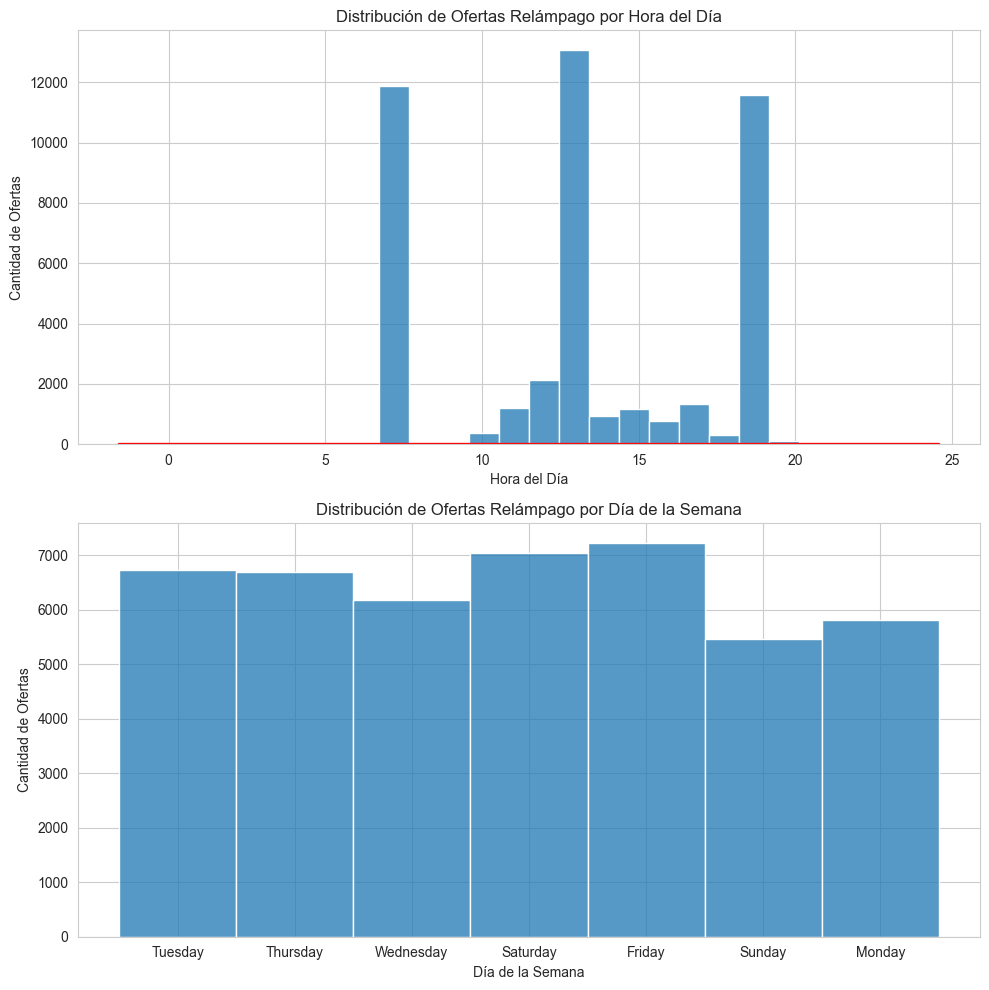

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de seaborn
sns.set_style("whitegrid")

# Crear subplots para los dos gráficos
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Gráfico de distribución de ofertas por hora
sns.histplot(data=df, x='HOUR_OF_DAY', bins=24, ax=ax1)
ax1.set_title('Distribución de Ofertas Relámpago por Hora del Día')
ax1.set_xlabel('Hora del Día')
ax1.set_ylabel('Cantidad de Ofertas')

# Añadir línea de tendencia suavizada al primer gráfico
sns.kdeplot(data=df, x='HOUR_OF_DAY', color='red', linewidth=2, ax=ax1)

# Gráfico de distribución por día de la semana
sns.histplot(data=df, x='DAY_OF_WEEK', ax=ax2)
ax2.set_title('Distribución de Ofertas Relámpago por Día de la Semana')
ax2.set_xlabel('Día de la Semana')
ax2.set_ylabel('Cantidad de Ofertas')

plt.tight_layout()
plt.show()


Es contundente la conclusión de que a las 7am, 13pm y 19pm se publican la gran mayoria de las ofertas. La diferencia no es tan marcada en relacion a los dias de la semana. 

In [31]:
# Que porcentaje de las ofertas se realiza a las 7am, 13pm y 19pm? 
horas_pico = df[df['HOUR_OF_DAY'].isin([7, 13, 19])].shape[0]
total_ventas = df.shape[0]
porcentaje = (horas_pico / total_ventas) * 100

print(f"El porcentaje de ofertas realizadas a las 7am, 13pm y 19pm es: {porcentaje:.2f}%")


El porcentaje de ofertas realizadas a las 7am, 13pm y 19pm es: 80.93%


Veamos ahora el offer duration

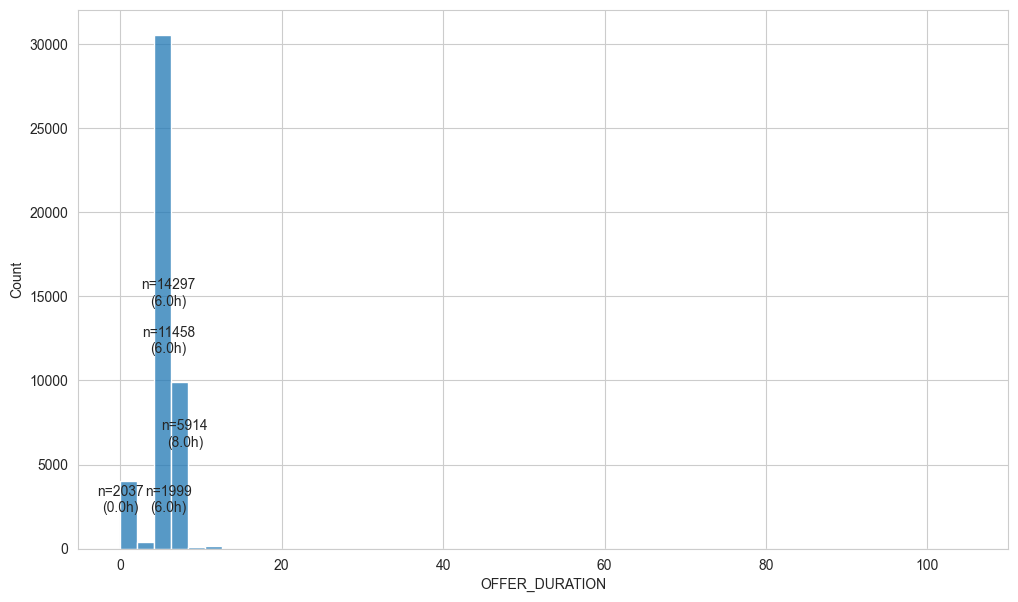

<Figure size 1200x300 with 0 Axes>

In [33]:
# Crear histograma de duración de ofertas con mejor visualización
plt.figure(figsize=(12, 7))

# Crear histograma principal con escala logarítmica para mejor visualización
ax = sns.histplot(data=df, x='OFFER_DURATION', bins=50)

# Obtener los valores más frecuentes
top_durations = df['OFFER_DURATION'].value_counts().head(5)

# Agregar etiquetas para los casos más frecuentes
for duration, count in top_durations.items():
    ax.text(duration, count, f'n={count}\n({duration:.1f}h)', 
            horizontalalignment='center',
            verticalalignment='bottom')

# Añadir boxplot para visualizar outliers
plt.figure(figsize=(12, 3))

plt.tight_layout()
plt.show()


Existe un outlier que nos esta molestando para visualizar las duraciones, vamos a eliminarlo por simplicidad dado que no tiene ventas.

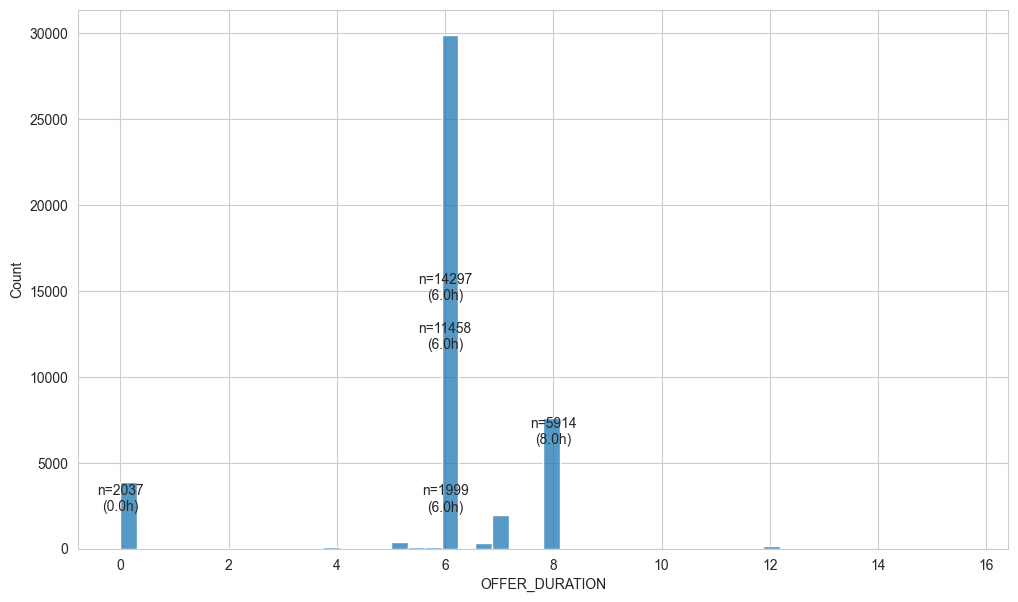

<Figure size 1200x300 with 0 Axes>

In [34]:
#Eliminar el outlier
df = df[df['OFFER_DURATION'] <= 50]

# Crear histograma de duración de ofertas con mejor visualización
plt.figure(figsize=(12, 7))

# Crear histograma principal con escala logarítmica para mejor visualización
ax = sns.histplot(data=df, x='OFFER_DURATION', bins=50)

# Obtener los valores más frecuentes
top_durations = df['OFFER_DURATION'].value_counts().head(5)

# Agregar etiquetas para los casos más frecuentes
for duration, count in top_durations.items():
    ax.text(duration, count, f'n={count}\n({duration:.1f}h)', 
            horizontalalignment='center',
            verticalalignment='bottom')

# Añadir boxplot para visualizar outliers
plt.figure(figsize=(12, 3))

plt.tight_layout()
plt.show()


Podemos ver que la mayoria de las ofertas duran 6 horas, luego 8horas y luego menos de 0.1hrs. 

Un insight interesante es ver cuantas ofertas duraron realmente 0, y si alguna tiene ventas. Podríamos eliminar estas del analisis.

In [43]:
print("Total ofertas con duración cero:", df[df['OFFER_DURATION'] ==0].shape[0])
print("Ofertas con duración cero y sin ventas:", df[(df['OFFER_DURATION'] == 0) & (df['SOLD_QUANTITY']==0)].shape[0])
print("Ofertas con duración cero y sin ventas:", df[(df['OFFER_DURATION'] == 0) & (df['SOLD_QUANTITY']==0)].shape[0], 
      f"({(df[(df['OFFER_DURATION'] == 0) & (df['SOLD_QUANTITY']==0)].shape[0] / df.shape[0] * 100):.1f}% del total)")


Total ofertas con duración cero: 2037
Ofertas con duración cero y sin ventas: 2037
Ofertas con duración cero y sin ventas: 2037 (4.5% del total)


Esto es un gran insight, pero vamos a eliminar estas del dataset para que no ensucien los analisis de ventas y eficiencia

In [44]:
# Eliminamos las ofertas con duración cero
df = df[df['OFFER_DURATION'] != 0]

### Sales rate ('SOLD_QUANTITY' /'INVOLVED_STOCK')

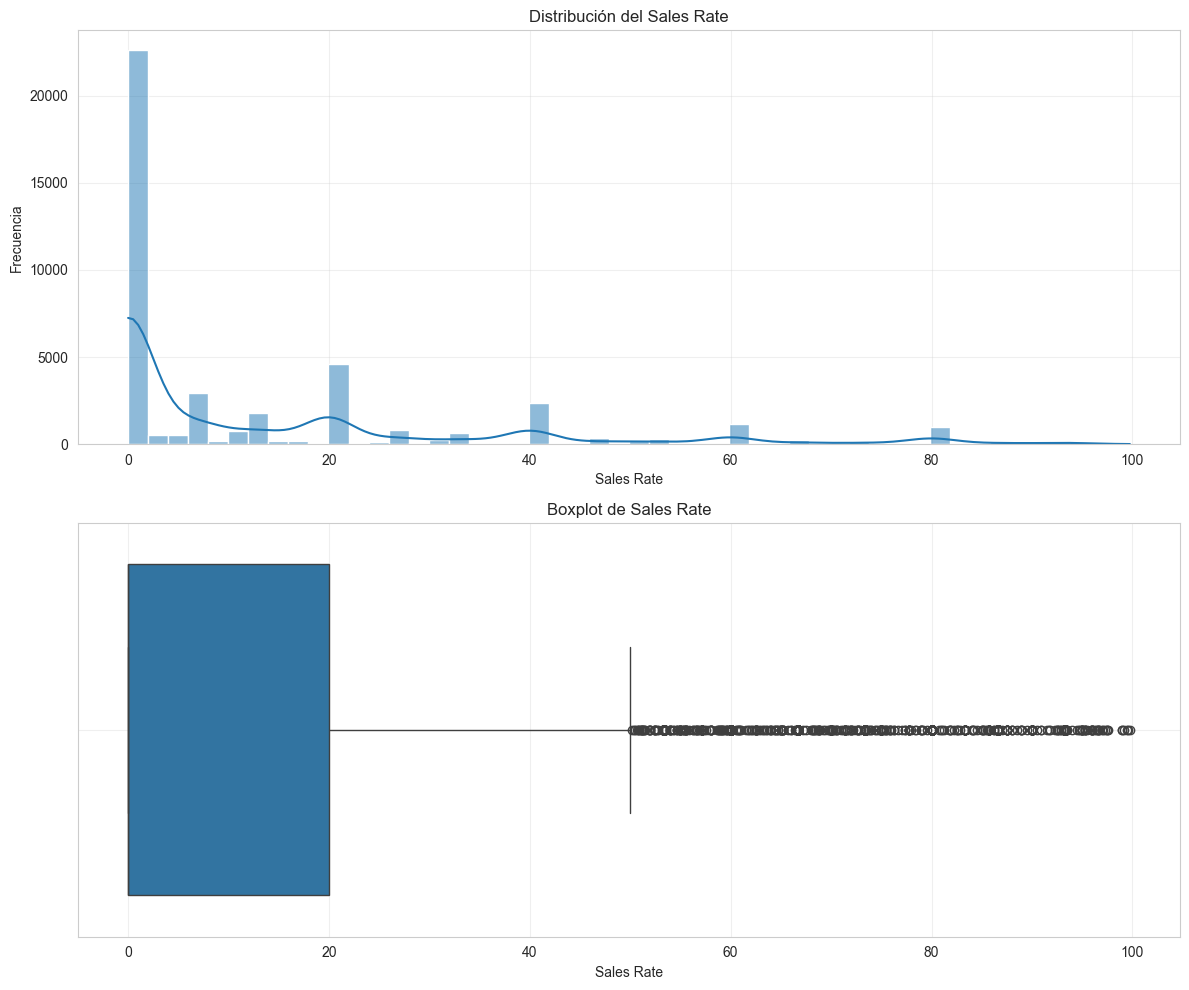

In [47]:
# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Histograma con KDE
sns.histplot(data=df, x='SALES_RATE', bins=50, kde=True, ax=ax1)
ax1.set_title('Distribución del Sales Rate')
ax1.set_xlabel('Sales Rate')
ax1.set_ylabel('Frecuencia')
ax1.grid(True, alpha=0.3)

# Boxplot
sns.boxplot(x=df['SALES_RATE'], ax=ax2)
ax2.set_title('Boxplot de Sales Rate')
ax2.set_xlabel('Sales Rate')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


La mayoria de las ofertas practicamente no funcionan y tienen un sales rate cercano a cero o de cero. Aunque existen varios picos distriuidos en los 20, 40, 60 y 80. En el boxplot podemos ver una mediana relativamente baja y unos cuantos outliers en la derecha. 

## ROTACION_INVENTARIO (SALES RATE / OFFER DURATION)

La rotacion de inventario en este mide el ratio entre el porcentaje de cantidad vendido en proporcion al tiempo que estuvo activa la oferta. Esta metrica puede darnos una idea de cuales son las ofertas que mejor rindieron en el tiempo dado. 

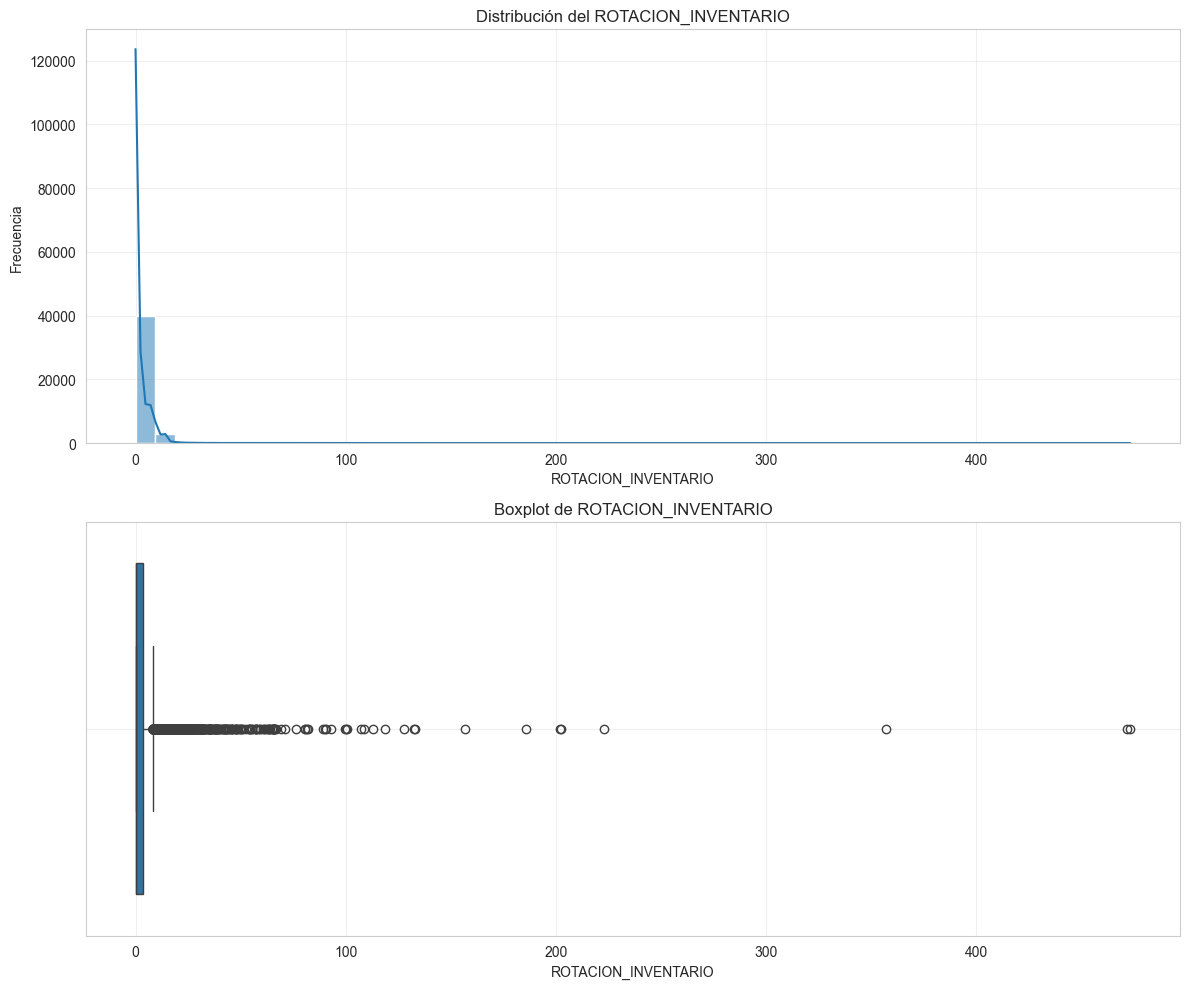

In [48]:
# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Histograma con KDE
sns.histplot(data=df, x='ROTACION_INVENTARIO', bins=50, kde=True, ax=ax1)
ax1.set_title('Distribución del ROTACION_INVENTARIO')
ax1.set_xlabel('ROTACION_INVENTARIO')
ax1.set_ylabel('Frecuencia')
ax1.grid(True, alpha=0.3)

# Boxplot
sns.boxplot(x=df['ROTACION_INVENTARIO'], ax=ax2)
ax2.set_title('Boxplot de ROTACION_INVENTARIO')
ax2.set_xlabel('ROTACION_INVENTARIO')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Podemos ver que tambien tenemos una distribución sesgada a la izquierda, mas que la anterior, pero con algunos casos de alta eficiencia. 

In [49]:
## muestrame los casos de alta eficiencia de rotacion de inventario
df[df['ROTACION_INVENTARIO'] > 100].head()


,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,...,AVERAGE_PRICE,REAL_SOLD_QUANTITY,QUANTITY_DISCREPANCY,REMAINING_STOCK,CHECK_REMAINING_STOCK,SALES_RATE,SUCCESS,ROTACION_INVENTARIO,AMOUNT_EFFICIENCY,NO_SALES_NO_DURATION
1544,2021-07-08,2021-07-08 19:00:00+00:00,2021-07-08 19:35:53+00:00,5,-1,4.20,3.0,UNKNOWN,free_shipping,PHARMACEUTICS,...,1.400000,6,3.0,2.0,False,60.0,True,100.334448,7.023411,False
3583,2021-06-26,2021-06-26 19:00:00+00:00,2021-06-26 19:40:27+00:00,5,0,6.59,4.0,UNKNOWN,none,PARTY,...,1.647500,5,1.0,1.0,False,80.0,True,118.694362,9.777448,False
4864,2021-07-23,2021-07-23 18:00:00+00:00,2021-07-23 18:50:23+00:00,20,-2,73.75,19.0,A,free_shipping,PHARMACEUTICS,...,3.881579,22,3.0,1.0,False,95.0,True,113.095238,87.797619,False
6488,2021-06-16,2021-06-16 13:00:00+00:00,2021-06-16 13:10:10+00:00,5,0,7.04,4.0,UNKNOWN,none,PERSONAL CARE,...,1.760000,5,1.0,1.0,False,80.0,True,473.372781,41.656805,False
7724,2021-07-07,2021-07-07 13:00:00+00:00,2021-07-07 13:44:11+00:00,5,0,50.75,4.0,UNKNOWN,free_shipping,COMPUTERS,...,12.687500,5,1.0,1.0,False,80.0,True,108.695652,68.953804,False



Distribución por categoría:
DOM_DOMAIN_AGG1
HOME&DECOR                      13.87
PHARMACEUTICS                   12.39
COMPUTERS                       10.17
APPAREL ACCESORIES               8.39
SPORTS                           7.50
PERSONAL CARE                    6.42
APPAREL                          6.27
ELECTRONICS                      4.89
MOBILE                           4.24
AUTOPARTS                        4.20
BEAUTY EQUIPMENT                 2.91
STATIONARY                       2.32
INDUSTRY                         2.17
FOOTWEAR                         1.92
FOODS                            1.73
TOOLS AND CONSTRUCTION           1.63
SECURITY                         1.33
TOYS AND GAMES                   1.04
PETS FOOD                        1.04
PERSONAL HYGIENE                 0.84
MOTOPARTS                        0.69
PARTY                            0.64
SUPLEMENTS                       0.54
CLEANING                         0.49
PET PRODUCTS                     0.49
VEHIC

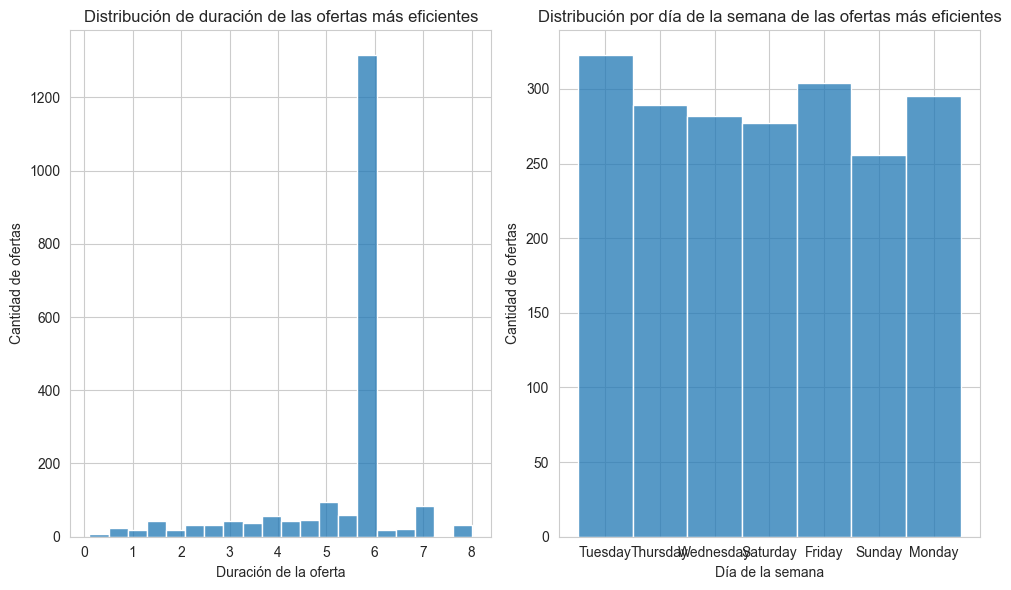

In [50]:
# 1. Identificar las ofertas más eficientes (top 5%)
threshold = df['ROTACION_INVENTARIO'].quantile(0.95)
top_efficient = df[df['ROTACION_INVENTARIO'] > threshold]

# 3. Distribución por categorías
print("\nDistribución por categoría:")
print(top_efficient['DOM_DOMAIN_AGG1'].value_counts(normalize=True).mul(100).round(2))

# 4. Análisis de características clave
print("\nTipo de envío:")
print(top_efficient['SHIPPING_PAYMENT_TYPE'].value_counts(normalize=True).mul(100).round(2))

# 5. Visualización de duración y día de la semana
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

sns.histplot(data=top_efficient, x='OFFER_DURATION', bins=20, ax=ax1)
ax1.set_title('Distribución de duración de las ofertas más eficientes')
ax1.set_xlabel('Duración de la oferta')
ax1.set_ylabel('Cantidad de ofertas')

sns.histplot(data=top_efficient, x='DAY_OF_WEEK', ax=ax2)
ax2.set_title('Distribución por día de la semana de las ofertas más eficientes')
ax2.set_xlabel('Día de la semana')
ax2.set_ylabel('Cantidad de ofertas')

plt.tight_layout()
plt.show()

Podemos ver que las categorias absolutas con mayor eficiencia de oferta son HOME&DECOR, PHARMACEUTICS y COMPUTERS. No parece haber una relacion con los dias de la semana y si con la duracion de la oferta, aunque nos encontramos sesgados por la distribución inicial, corrijamos esto. Tampoco hay diferencias significativas considerando el free shiping.                 


Estadísticas de eficiencia por categoría de duración:
                     count   mean    std  min  25%    50%    75%     max
DURATION_CATEGORY                                                       
0-2h                1988.0   3.97  23.81  0.0  0.0   0.00   0.00  473.37
2-4h                 335.0  15.95  13.24  0.0  0.0  19.00  26.15   45.29
4-6h               12137.0   2.92   4.10  0.0  0.0   1.11   3.62   23.28
6-8h               26643.0   2.12   3.27  0.0  0.0   0.00   3.33   15.88
8-10h               1780.0   0.65   1.48  0.0  0.0   0.00   0.62   11.55
>10h                 174.0   1.62   1.96  0.0  0.0   1.11   2.67    9.40

Número de ofertas por categoría de duración:
DURATION_CATEGORY
0-2h      1988
2-4h       335
4-6h     12137
6-8h     26643
8-10h     1780
>10h       174
Name: count, dtype: int64


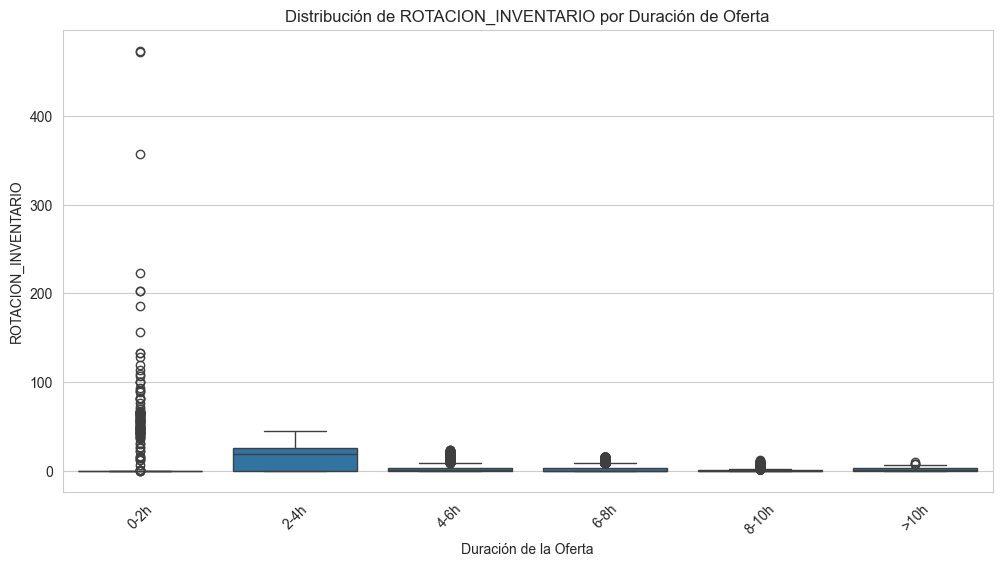

In [60]:
# 1. Crear visualización de la relación entre duración y eficiencia
plt.figure(figsize=(12, 6))

# 2. Crear un boxplot agrupado por rangos de duración
bins = [0, 2, 4, 6, 8, 10, float('inf')]
labels = ['0-2h', '2-4h', '4-6h', '6-8h', '8-10h', '>10h']
df['DURATION_CATEGORY'] = pd.cut(df['OFFER_DURATION'], bins=bins, labels=labels)

# 3. Crear el boxplot
sns.boxplot(x='DURATION_CATEGORY', y='ROTACION_INVENTARIO', data=df)

plt.title('Distribución de ROTACION_INVENTARIO por Duración de Oferta')
plt.xlabel('Duración de la Oferta')
plt.ylabel('ROTACION_INVENTARIO')
plt.xticks(rotation=45)

# 4. Agregar información estadística
print("\nEstadísticas de eficiencia por categoría de duración:")
print(df.groupby('DURATION_CATEGORY')['ROTACION_INVENTARIO'].describe().round(2))

# 5. Calcular el número de ofertas por categoría
print("\nNúmero de ofertas por categoría de duración:")
print(df['DURATION_CATEGORY'].value_counts().sort_index())

plt.show()

Las ofertas más cortas (0-2h) muestran la mayor variabilidad en rotacion de inventario, con algunos valores muy altos pero la mayoría cerca de 0%. Las ofertas de 2-4h parecen tener el mejor balance, con una eficiencia media más alta y menos valores extremos. Las ofertas más largas (>4h) son más estables y predecibles, pero con menor eficiencia general. En resumen, parecería que las ofertas de 2-4h son el punto óptimo entre eficiencia y predictibilidad.

## Amount efficiency (SOLD AMOUNT / OFFER DURATION)


Distribución por categoría:
DOM_DOMAIN_AGG1
PHARMACEUTICS             37.25
ELECTRONICS               11.24
MOBILE                    10.17
BEAUTY EQUIPMENT           7.76
COMPUTERS                  7.57
HOME&DECOR                 7.34
TOOLS AND CONSTRUCTION     2.69
SPORTS                     2.46
INDUSTRY                   2.32
APPAREL ACCESORIES         1.90
FOOTWEAR                   1.86
APPAREL                    1.86
SECURITY                   1.02
BABY                       0.70
TOYS AND GAMES             0.65
SUPLEMENTS                 0.42
PERSONAL CARE              0.42
AUTOPARTS                  0.42
VEHICULAR MULTIMEDIA       0.42
PETS FOOD                  0.33
MOTOPARTS                  0.28
CLEANING                   0.23
PERSONAL HYGIENE           0.23
WHEELS & TIRES             0.19
STATIONARY                 0.14
ACC TOOLS                  0.05
DRINKS                     0.05
MUSICAL INSTRUMENTS        0.05
Name: proportion, dtype: float64

Tipo de envío:
SHIPPING_P

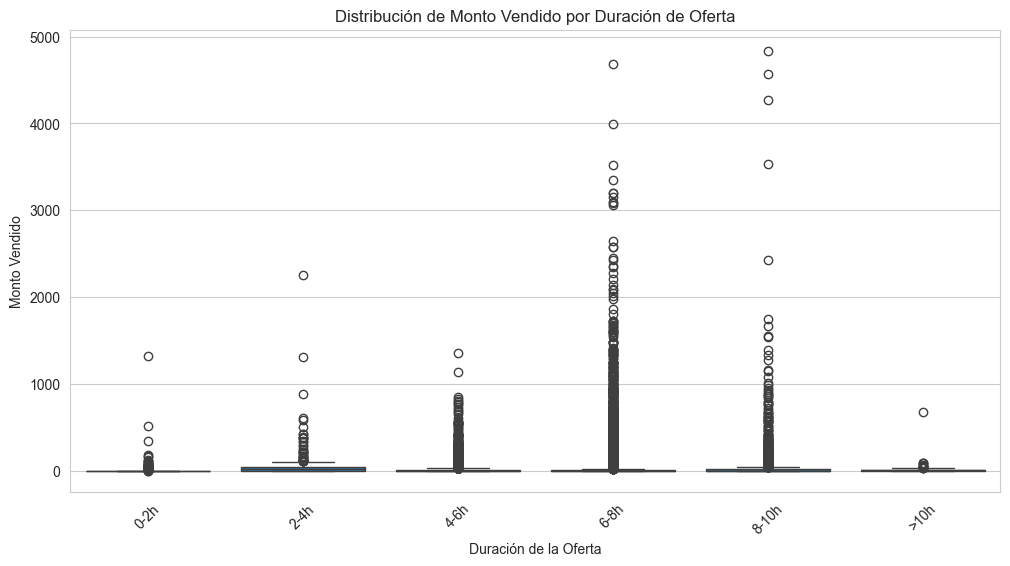

In [52]:
# 1. Identificar las ofertas con mayor monto vendido (top 5%)
threshold = df['SOLD_AMOUNT'].quantile(0.95)
top_amount = df[df['SOLD_AMOUNT'] > threshold]

# 3. Distribución por categorías
print("\nDistribución por categoría:")
print(top_amount['DOM_DOMAIN_AGG1'].value_counts(normalize=True).mul(100).round(2))

# 4. Análisis de características clave
print("\nTipo de envío:")
print(top_amount['SHIPPING_PAYMENT_TYPE'].value_counts(normalize=True).mul(100).round(2))

# 1. Crear visualización de la relación entre duración y monto vendido
plt.figure(figsize=(12, 6))

# 2. Crear un boxplot agrupado por rangos de duración
bins = [0, 2, 4, 6, 8, 10, float('inf')]
labels = ['0-2h', '2-4h', '4-6h', '6-8h', '8-10h', '>10h']
df['DURATION_CATEGORY'] = pd.cut(df['OFFER_DURATION'], bins=bins, labels=labels)

# 3. Crear el boxplot
sns.boxplot(x='DURATION_CATEGORY', y='SOLD_AMOUNT', data=df)

plt.title('Distribución de Monto Vendido por Duración de Oferta')
plt.xlabel('Duración de la Oferta')
plt.ylabel('Monto Vendido')
plt.xticks(rotation=45)

# 4. Agregar información estadística
print("\nEstadísticas de monto vendido por categoría de duración:")
print(df.groupby('DURATION_CATEGORY')['SOLD_AMOUNT'].describe().round(2))

# 5. Calcular el número de ofertas por categoría
print("\nNúmero de ofertas por categoría de duración:")
print(df['DURATION_CATEGORY'].value_counts().sort_index())

plt.show()

En este caso los domains que mejor performan en terminos de ingresos cambian, estos son PHARMACEUTICS, ELECTRONICS y MOBILE, aunque COMPUTERS tambien consigue una buena metrica. No hay una clara diferencia en esta metrica como lo teniamos anteriormente en funcion de la duracion de la oferta. 

El free shipping parece tener un impacto en los ingresos si vemos que:

- free_shipping  65.26 %
- none  34.74. %

### Agrupacion de domains DOM_DOMAIN_AGG1

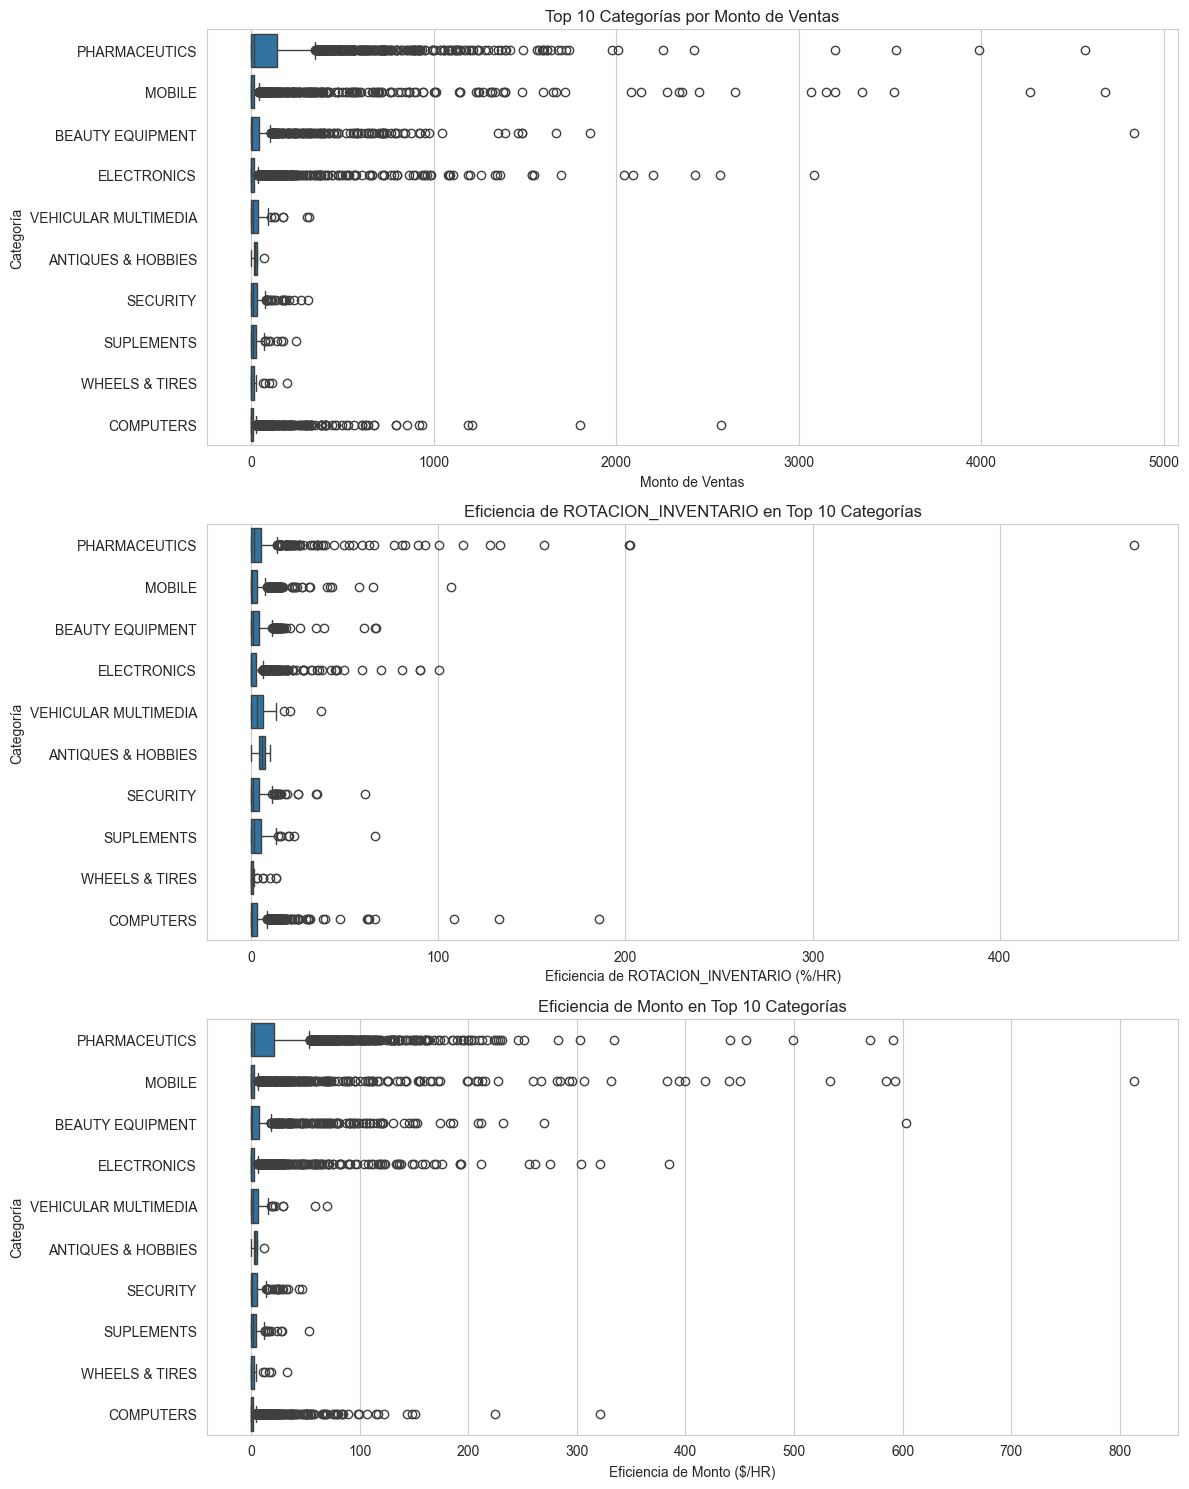


Estadísticas de las top 10 categorías:
                      SOLD_AMOUNT  ROTACION_INVENTARIO  AMOUNT_EFFICIENCY  \
DOM_DOMAIN_AGG1                                                             
PHARMACEUTICS              134.07                 4.51              19.80   
MOBILE                      85.73                 2.67              12.70   
BEAUTY EQUIPMENT            79.86                 3.21              11.92   
ELECTRONICS                 39.31                 2.13               5.54   
VEHICULAR MULTIMEDIA        32.88                 4.19               5.96   
ANTIQUES & HOBBIES          28.45                 5.55               4.74   
SECURITY                    25.34                 3.54               4.10   
SUPLEMENTS                  21.39                 3.54               3.74   
WHEELS & TIRES              21.30                 1.94               3.55   
COMPUTERS                   20.51                 2.89               3.19   

                      count  
DOM_D

In [53]:
# 1. Primero, calculemos las métricas promedio por categoría y ordenemos por monto de ventas
category_stats = df.groupby('DOM_DOMAIN_AGG1').agg({
    'SOLD_AMOUNT': 'mean',
    'ROTACION_INVENTARIO': 'mean',
    'AMOUNT_EFFICIENCY': 'mean',
    'DOM_DOMAIN_AGG1': 'count'  # Para contar número de ofertas
}).rename(columns={'DOM_DOMAIN_AGG1': 'count'})

# 2. Ordenar por SOLD_AMOUNT para visualizar las categorías más relevantes
top_10_categories = category_stats.nlargest(10, 'SOLD_AMOUNT').index

# 3. Filtrar el DataFrame original para incluir solo las top 10 categorías
df_top10 = df[df['DOM_DOMAIN_AGG1'].isin(top_10_categories)]

# 4. Crear visualizaciones mejoradas
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

# Gráfico 1: SOLD_AMOUNT
sns.boxplot(x='SOLD_AMOUNT', y='DOM_DOMAIN_AGG1', data=df_top10, 
            order=top_10_categories, ax=ax1)
ax1.set_title('Top 10 Categorías por Monto de Ventas')
ax1.set_xlabel('Monto de Ventas')
ax1.set_ylabel('Categoría')

# Gráfico 2: ROTACION_INVENTARIO
sns.boxplot(x='ROTACION_INVENTARIO', y='DOM_DOMAIN_AGG1', data=df_top10, 
            order=top_10_categories, ax=ax2)
ax2.set_title('Eficiencia de ROTACION_INVENTARIO en Top 10 Categorías')
ax2.set_xlabel('Eficiencia de ROTACION_INVENTARIO (%/HR)')
ax2.set_ylabel('Categoría')

# Gráfico 3: AMOUNT_EFFICIENCY
sns.boxplot(x='AMOUNT_EFFICIENCY', y='DOM_DOMAIN_AGG1', data=df_top10, 
            order=top_10_categories, ax=ax3)
ax3.set_title('Eficiencia de Monto en Top 10 Categorías')
ax3.set_xlabel('Eficiencia de Monto ($/HR)')
ax3.set_ylabel('Categoría')

plt.tight_layout()
plt.show()

# 5. Mostrar estadísticas de las top 10 categorías
print("\nEstadísticas de las top 10 categorías:")
print(category_stats.loc[top_10_categories].round(2))

Esto resumen lo ya expuesto en los otros graficos. EL domino de pharmaceutics en es que mejor performa en todas las metricas, tanto en rotacion de inventario, como en ingresos totales y como en eficiencia de ingresos. 

## Agrupación por verticales

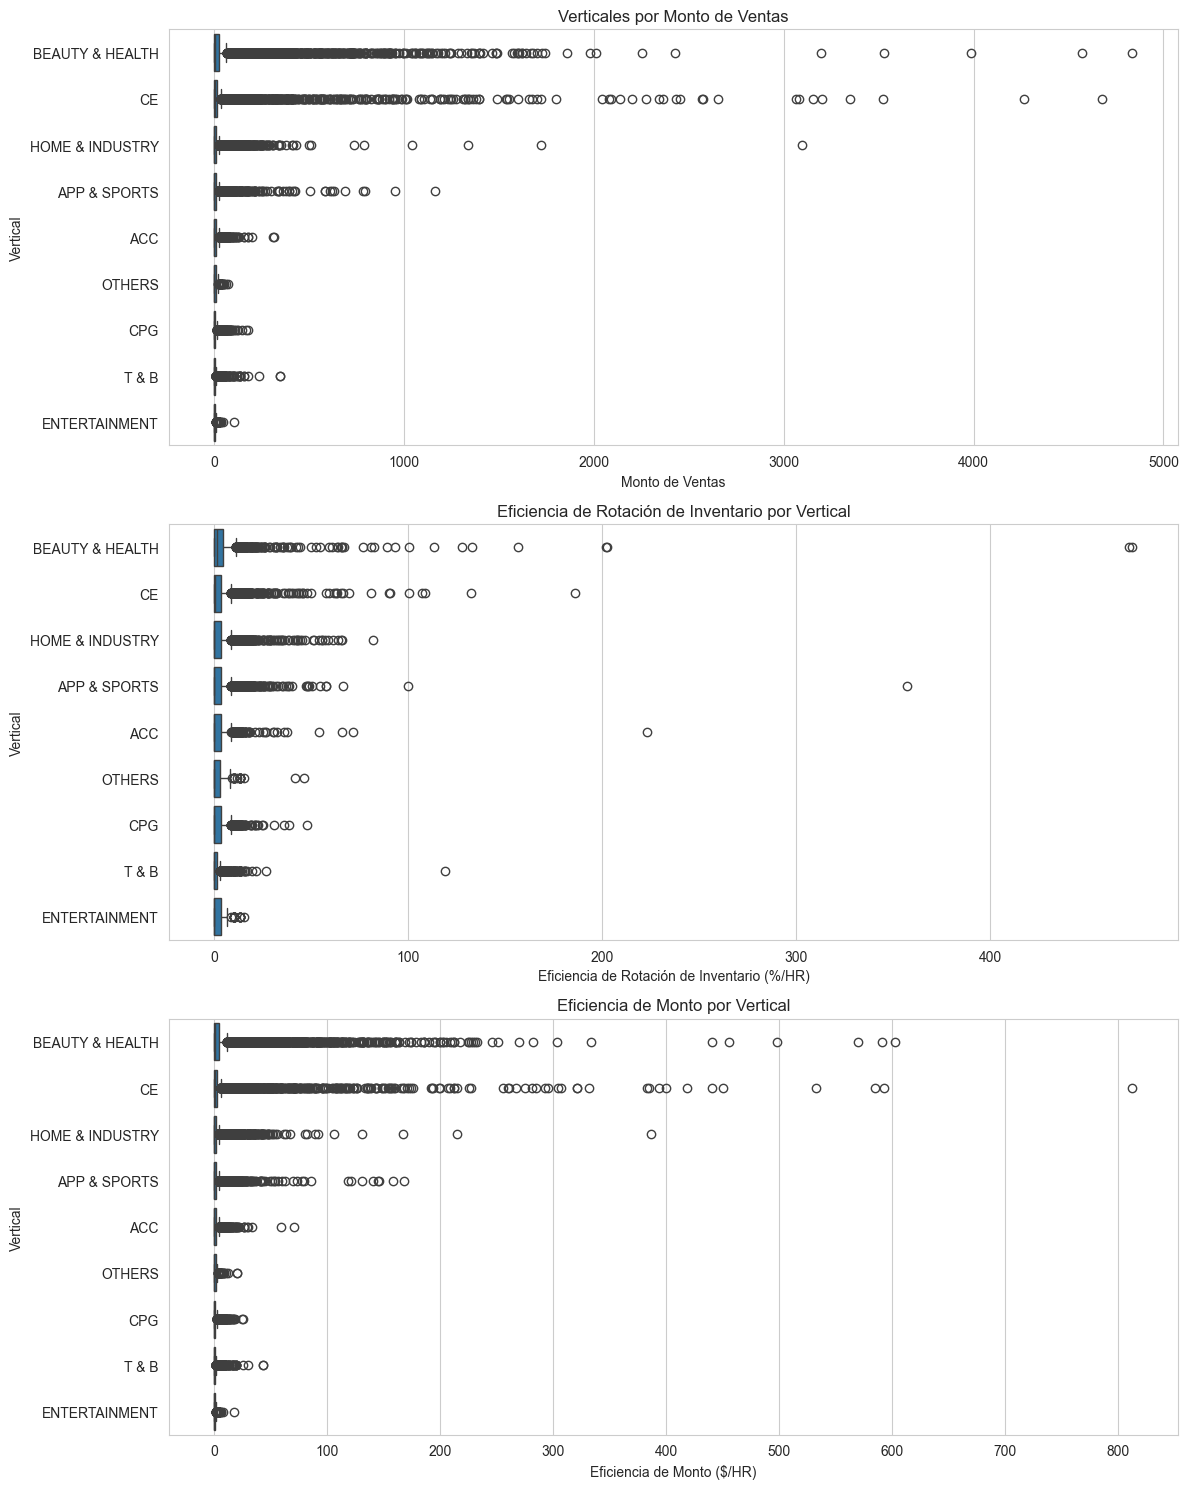


Estadísticas por vertical:
                 SOLD_AMOUNT  ROTACION_INVENTARIO  AMOUNT_EFFICIENCY  count
VERTICAL                                                                   
ACC                     8.46                 2.76               1.45   2232
APP & SPORTS            9.06                 2.40               1.47  11899
BEAUTY & HEALTH        69.70                 3.53              10.36   6011
CE                     41.02                 2.57               6.04   7608
CPG                     5.24                 2.03               0.82   2366
ENTERTAINMENT           3.29                 1.61               0.54    477
HOME & INDUSTRY        11.82                 2.27               1.87   9787
OTHERS                  6.60                 2.29               1.15    253
T & B                   5.11                 1.18               0.77   2424


In [58]:
# 1. Calculamos las métricas promedio por vertical
vertical_stats = df.groupby('VERTICAL').agg({
    'SOLD_AMOUNT': 'mean',
    'ROTACION_INVENTARIO': 'mean',
    'AMOUNT_EFFICIENCY': 'mean',
    'VERTICAL': 'count'  # Para contar número de ofertas
}).rename(columns={'VERTICAL': 'count'})

# 2. Ordenar por SOLD_AMOUNT
# No necesitamos top 10 ya que hay menos verticales, usamos todas
verticals_ordered = vertical_stats.sort_values('SOLD_AMOUNT', ascending=False).index

# 3. Crear visualizaciones mejoradas
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

# Gráfico 1: SOLD_AMOUNT
sns.boxplot(x='SOLD_AMOUNT', y='VERTICAL', data=df, 
            order=verticals_ordered, ax=ax1)
ax1.set_title('Verticales por Monto de Ventas')
ax1.set_xlabel('Monto de Ventas')
ax1.set_ylabel('Vertical')

# Gráfico 2: ROTACION_INVENTARIO
sns.boxplot(x='ROTACION_INVENTARIO', y='VERTICAL', data=df, 
            order=verticals_ordered, ax=ax2)
ax2.set_title('Eficiencia de Rotación de Inventario por Vertical')
ax2.set_xlabel('Eficiencia de Rotación de Inventario (%/HR)')
ax2.set_ylabel('Vertical')

# Gráfico 3: AMOUNT_EFFICIENCY
sns.boxplot(x='AMOUNT_EFFICIENCY', y='VERTICAL', data=df, 
            order=verticals_ordered, ax=ax3)
ax3.set_title('Eficiencia de Monto por Vertical')
ax3.set_xlabel('Eficiencia de Monto ($/HR)')
ax3.set_ylabel('Vertical')

plt.tight_layout()
plt.show()

# 5. Mostrar estadísticas por vertical
print("\nEstadísticas por vertical:")
print(vertical_stats.round(2))

Podemos ver que BEAUTY & HEALTH  y CE son las que mas ingresos tuvieron y tambien mayor eficiencia de ingresos, sin ser las de mayor cantidad de ofertas

### Average price vs SUCCES / ROTACION_INVENTARIO / AMOUNT_EFFICIENCY

Como no contamos con el precio real, este analisis esta sesgado solo a la poblacion que tuvo ventas! por lo que todas las conlusiones deben mantenerse en esta poblacion. 

=== Estadísticas de Precio Promedio ===

Estadísticas generales:
count    20928.00
mean         9.47
std         23.72
min          0.24
25%          2.50
50%          4.24
75%          8.05
max        639.07
Name: AVERAGE_PRICE, dtype: float64

Precio promedio por categoría:
                               mean  median    std  count
DOM_DOMAIN_AGG1                                          
WHEELS & TIRES                34.34   33.44  11.80      8
ELECTRONICS                   27.54    8.63  50.36   1238
MOBILE                        25.31    6.00  50.30    893
ANTIQUES & HOBBIES            15.68    6.95  17.50      3
COMPUTERS                     14.79    3.69  45.88   1754
BABY                          14.42    7.50  15.52    167
VEHICULAR MULTIMEDIA          13.34   10.64   8.71     48
MUSICAL INSTRUMENTS           12.93   16.34   5.95      6
INDUSTRY                      11.86    7.52  14.59    443
SECURITY                      11.26   11.06   8.71    155
SUPLEMENTS                 

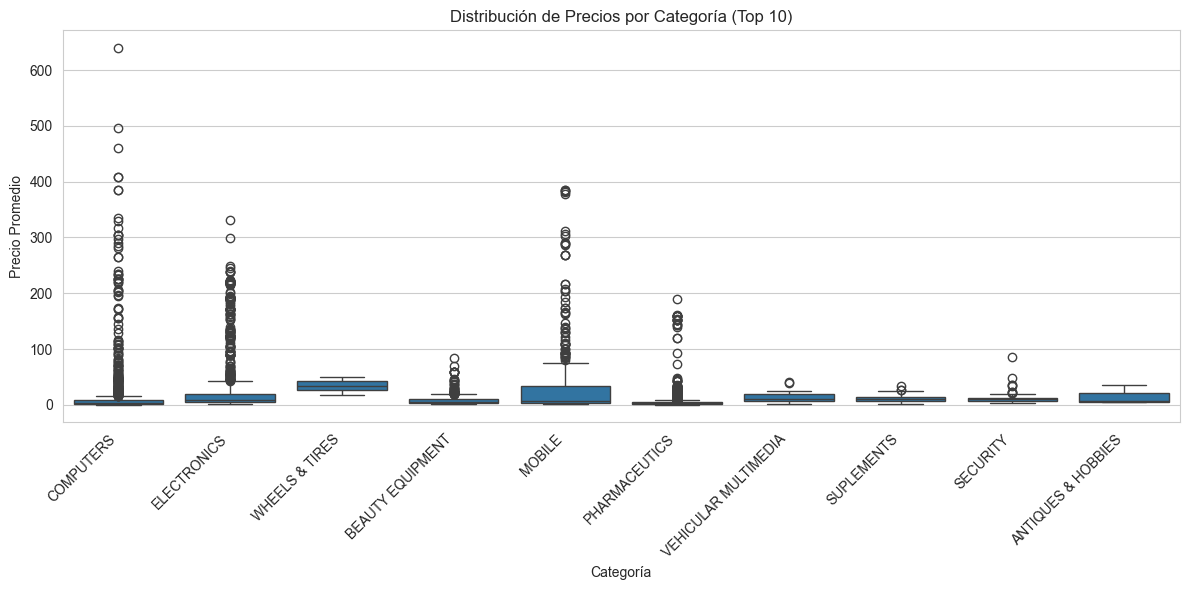

In [54]:
# Analicemos average price
# Estadísticas descriptivas de AVERAGE_PRICE
print("=== Estadísticas de Precio Promedio ===")
print("\nEstadísticas generales:")
print(df['AVERAGE_PRICE'].describe().round(2))


# Análisis por categoría
print("\nPrecio promedio por categoría:")
precio_categoria = df.groupby('DOM_DOMAIN_AGG1')['AVERAGE_PRICE'].agg(['mean', 'median', 'std', 'count']).round(2)
print(precio_categoria.sort_values('mean', ascending=False))

# Box plot de precios por categoría (top 10)
plt.figure(figsize=(12, 6))
sns.boxplot(x='DOM_DOMAIN_AGG1', y='AVERAGE_PRICE', 
            data=df[df['DOM_DOMAIN_AGG1'].isin(top_10_categories)])
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de Precios por Categoría (Top 10)')
plt.xlabel('Categoría')
plt.ylabel('Precio Promedio')
plt.tight_layout()
plt.show()


=== Estadísticas de Precio Promedio ===

Estadísticas generales:
count    20928.00
mean         9.47
std         23.72
min          0.24
25%          2.50
50%          4.24
75%          8.05
max        639.07
Name: AVERAGE_PRICE, dtype: float64

Precio promedio por vertical:
                  mean  median    std  count
VERTICAL                                    
CE               21.27    5.68  48.72   3885
T & B             9.68    5.24  16.34    698
HOME & INDUSTRY   7.74    4.35  12.31   4545
OTHERS            7.48    4.54   8.18    110
ACC               7.06    3.92   7.13   1076
APP & SPORTS      6.39    4.49   7.10   5838
BEAUTY & HEALTH   6.19    3.38  13.04   3616
ENTERTAINMENT     5.91    4.13   5.15    161
CPG               4.46    3.11   4.74    999


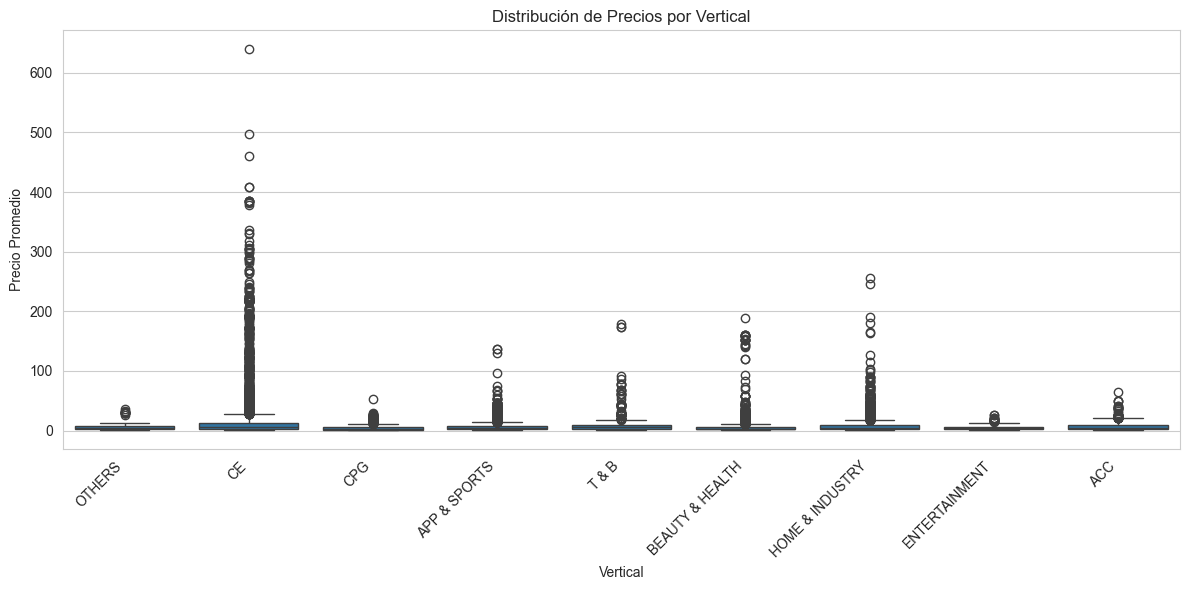

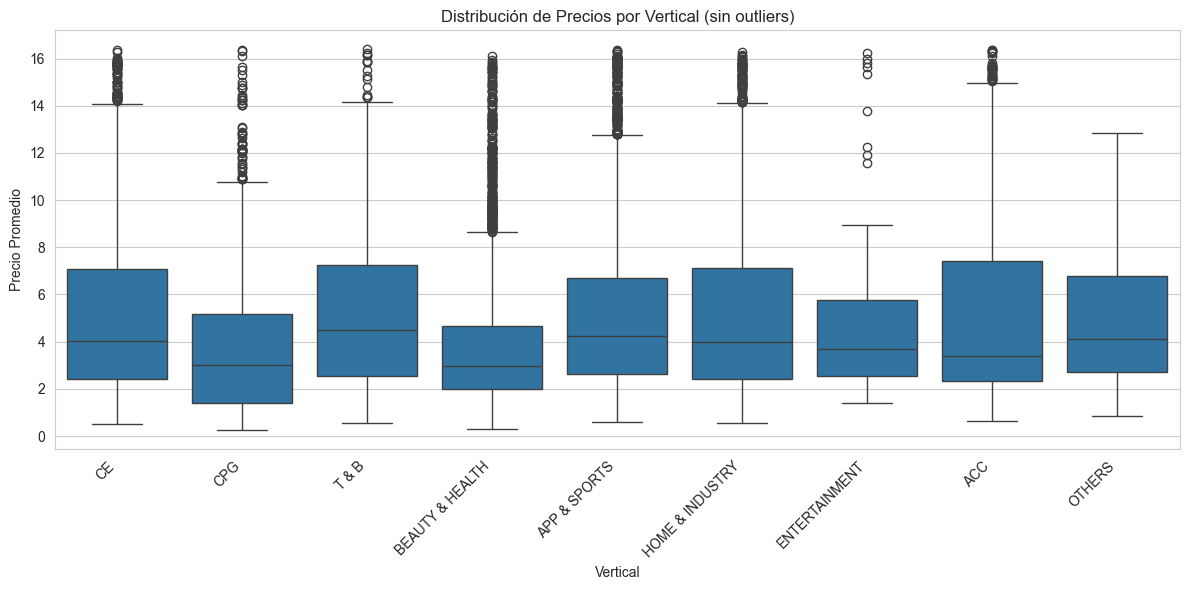

In [59]:
# Analicemos average price por vertical
print("=== Estadísticas de Precio Promedio ===")
print("\nEstadísticas generales:")
print(df['AVERAGE_PRICE'].describe().round(2))

# Análisis por vertical
print("\nPrecio promedio por vertical:")
precio_vertical = df.groupby('VERTICAL')['AVERAGE_PRICE'].agg(['mean', 'median', 'std', 'count']).round(2)
print(precio_vertical.sort_values('mean', ascending=False))

# Box plot de precios por vertical
plt.figure(figsize=(12, 6))
sns.boxplot(x='VERTICAL', y='AVERAGE_PRICE', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de Precios por Vertical')
plt.xlabel('Vertical')
plt.ylabel('Precio Promedio')
plt.tight_layout()
plt.show()

# Versión sin outliers para mejor visualización
# Removemos outliers usando IQR
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

df_clean = remove_outliers(df, 'AVERAGE_PRICE')

# Box plot sin outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='VERTICAL', y='AVERAGE_PRICE', data=df_clean)
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de Precios por Vertical (sin outliers)')
plt.xlabel('Vertical')
plt.ylabel('Precio Promedio')
plt.tight_layout()
plt.show()

Se Puede ver que CE tiene muchos outliers de precios y un precio promedio en general alto.


Rangos de precios (quantiles):
AVERAGE_PRICE
(0.239, 2.2]      4186
(2.2, 3.373]      4185
(3.373, 5.485]    4187
(5.485, 9.45]     4185
(9.45, 639.07]    4185
Name: count, dtype: int64


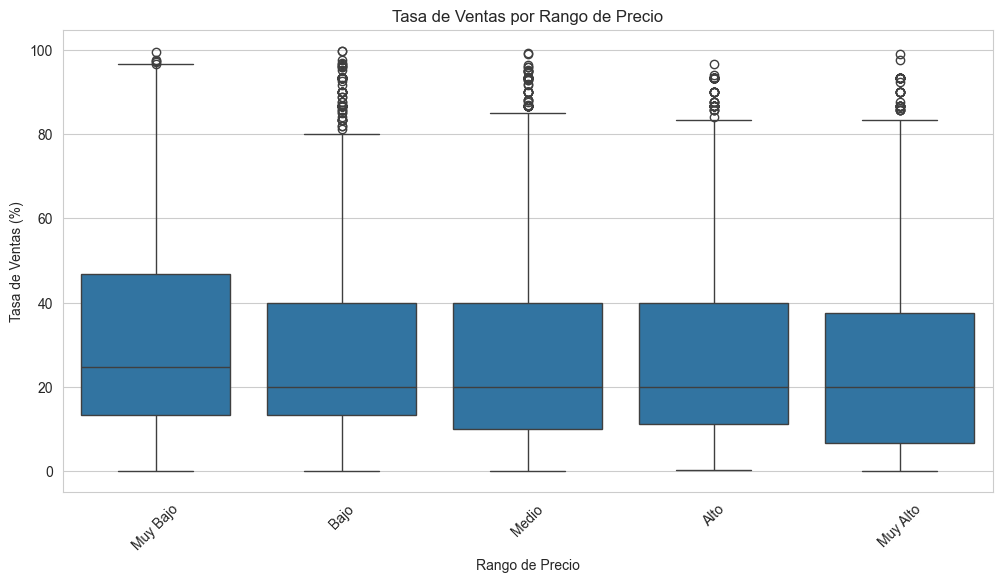

In [56]:
# Eliminamos las filas con valores nulos en AVERAGE_PRICE
df_clean = df.dropna(subset=['AVERAGE_PRICE'])

# 1. Primero, vamos a crear rangos de precios para facilitar el análisis
df_clean['PRICE_RANGE'] = pd.qcut(df_clean['AVERAGE_PRICE'], q=5, labels=['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto'])

# Mostramos los rangos de precios
print("\nRangos de precios (quantiles):")
print(pd.qcut(df_clean['AVERAGE_PRICE'], q=5).value_counts().sort_index())

# 3. Visualización de la relación precio-éxito
plt.figure(figsize=(12, 6))
sns.boxplot(x='PRICE_RANGE', y='SALES_RATE', data=df_clean[df_clean['AVERAGE_PRICE'] > 0])
plt.title('Tasa de Ventas por Rango de Precio')
plt.xlabel('Rango de Precio')
plt.ylabel('Tasa de Ventas (%)')
plt.xticks(rotation=45)
plt.show()


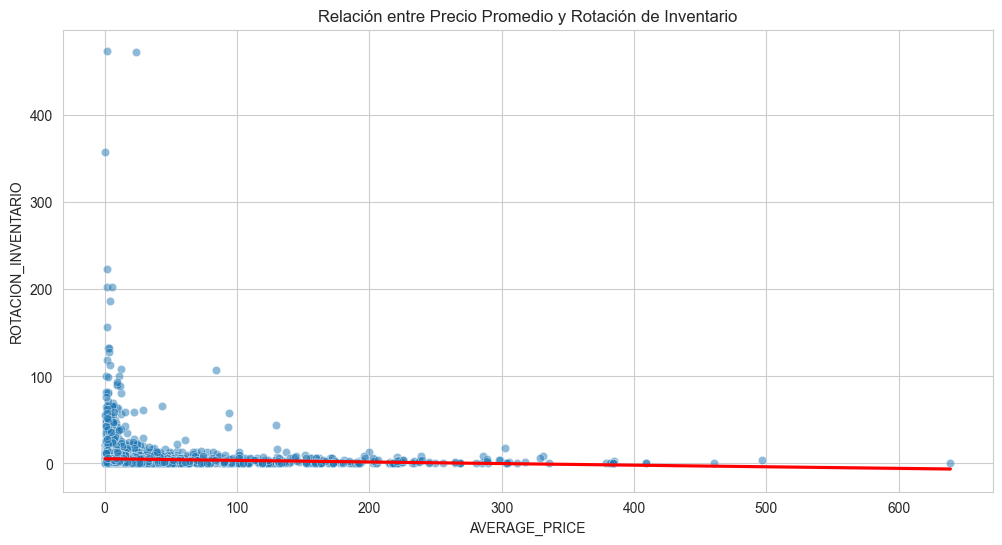


Correlación entre Precio Promedio y Rotación de Inventario: -0.052

Estadísticas de Rotación de Inventario por Rango de Precio:
             mean  median    std  count
PRICE_RANGE                            
Muy Bajo     6.11    3.62  12.08   4186
Bajo         5.23    3.33   6.03   4185
Medio        4.86    3.33   6.38   4187
Alto         4.89    3.33   6.16   4185
Muy Alto     4.38    3.33   9.51   4185


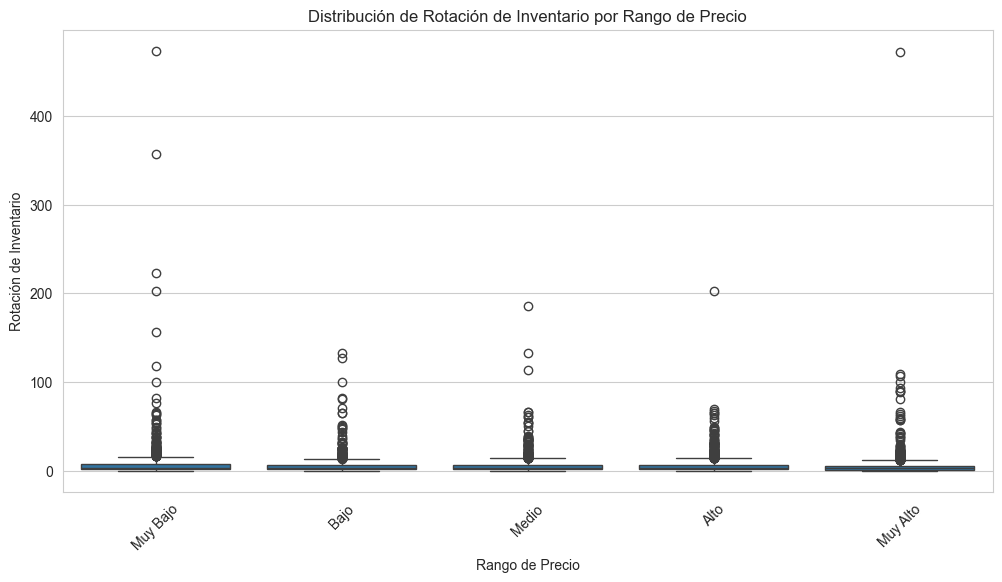

In [57]:
# Análisis de la relación entre precio promedio y rotación de inventario

# Creamos un scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_clean, x='AVERAGE_PRICE', y='ROTACION_INVENTARIO', alpha=0.5)
plt.title('Relación entre Precio Promedio y Rotación de Inventario')
plt.xlabel('Precio Promedio')
plt.ylabel('Rotación de Inventario')

# Agregamos una línea de tendencia
sns.regplot(data=df_clean, x='AVERAGE_PRICE', y='ROTACION_INVENTARIO', 
            scatter=False, color='red')

plt.show()

# Calculamos la correlación
correlacion = df_clean['AVERAGE_PRICE'].corr(df_clean['ROTACION_INVENTARIO'])
print("\nCorrelación entre Precio Promedio y Rotación de Inventario:", round(correlacion, 3))

# Análisis por rango de precios

print("\nEstadísticas de Rotación de Inventario por Rango de Precio:")
rotacion_por_precio = df_clean.groupby('PRICE_RANGE')['ROTACION_INVENTARIO'].agg(['mean', 'median', 'std', 'count']).round(2)
print(rotacion_por_precio)

# Visualización de box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='PRICE_RANGE', y='ROTACION_INVENTARIO', data=df_clean)
plt.title('Distribución de Rotación de Inventario por Rango de Precio')
plt.xlabel('Rango de Precio')
plt.ylabel('Rotación de Inventario')
plt.xticks(rotation=45)
plt.show()


No parece haber mayores conclusiones en funcion del precio promedio y rotacion de inventario o tasa de ventas mas que por una leve diferencia entre los productos con precios muy bajos teniendo una mayor tasa de venta.

### Veamos que sucede con tantos outliers en la rotacion de inventario

In [47]:
# Identificamos y mostramos los outliers completos
print("\nDetalles completos de los outliers por Rango de Precio:")

outliers_completos = pd.DataFrame()  # DataFrame para almacenar todos los outliers

for precio in df_clean['PRICE_RANGE'].unique():
    # Calculamos Q1, Q3 e IQR para cada rango de precio
    q1 = df_clean[df_clean['PRICE_RANGE'] == precio]['ROTACION_INVENTARIO'].quantile(0.25)
    q3 = df_clean[df_clean['PRICE_RANGE'] == precio]['ROTACION_INVENTARIO'].quantile(0.75)
    iqr = q3 - q1
    
    # Definimos límites para outliers
    limite_superior = q3 + 1.5 * iqr
    
    # Filtramos outliers
    outliers = df_clean[
        (df_clean['PRICE_RANGE'] == precio) & 
        (df_clean['ROTACION_INVENTARIO'] > limite_superior)
    ].sort_values('ROTACION_INVENTARIO', ascending=False)
    
    if len(outliers) > 0:
        print(f"\nRango de Precio: {precio}")
        print(f"Número de outliers: {len(outliers)}")
        print("\nRegistros completos de los outliers:")
        
        # Agregamos los outliers al DataFrame general
        outliers_completos = pd.concat([outliers_completos, outliers])

outliers_completos


Detalles completos de los outliers por Rango de Precio:

Rango de Precio: Medio
Número de outliers: 121

Registros completos de los outliers:

Rango de Precio: Muy Alto
Número de outliers: 230

Registros completos de los outliers:

Rango de Precio: Bajo
Número de outliers: 159

Registros completos de los outliers:

Rango de Precio: Alto
Número de outliers: 142

Registros completos de los outliers:

Rango de Precio: Muy Bajo
Número de outliers: 106

Registros completos de los outliers:


,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,...,QUANTITY_DISCREPANCY,REMAINING_STOCK,CHECK_REMAINING_STOCK,SALES_RATE,SUCCESS,ROTACION_INVENTARIO,AMOUNT_EFFICIENCY,NO_SALES_NO_DURATION,DURATION_CATEGORY,PRICE_RANGE
46755,2021-07-16,2021-07-16 19:00:00+00:00,2021-07-16 19:30:07+00:00,15,0,61.57,14.0,UNKNOWN,free_shipping,COMPUTERS,...,1.0,1.0,False,93.333333,True,185.922975,122.649402,False,0-2h,Medio
43800,2021-07-12,2021-07-12 19:00:00+00:00,2021-07-12 19:42:10+00:00,15,0,49.70,14.0,UNKNOWN,none,PHARMACEUTICS,...,1.0,1.0,False,93.333333,True,132.764343,70.697013,False,0-2h,Medio
4864,2021-07-23,2021-07-23 18:00:00+00:00,2021-07-23 18:50:23+00:00,20,-2,73.75,19.0,A,free_shipping,PHARMACEUTICS,...,3.0,1.0,False,95.000000,True,113.095238,87.797619,False,0-2h,Medio
10576,2021-07-17,2021-07-17 13:00:00+00:00,2021-07-17 14:12:41+00:00,5,0,21.82,4.0,UNKNOWN,free_shipping,SUPLEMENTS,...,1.0,1.0,False,80.000000,True,66.061107,18.018167,False,0-2h,Medio
17061,2021-07-24,2021-07-24 19:00:00+00:00,2021-07-24 20:21:47+00:00,10,0,49.27,9.0,UNKNOWN,free_shipping,BEAUTY EQUIPMENT,...,1.0,1.0,False,90.000000,True,66.030814,36.148202,False,0-2h,Medio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11281,2021-07-27,2021-07-27 07:00:00+00:00,2021-07-27 12:40:31+00:00,15,0,26.66,14.0,UNKNOWN,none,HOME&DECOR,...,1.0,1.0,False,93.333333,True,16.446402,4.697797,False,4-6h,Muy Bajo
6221,2021-06-16,2021-06-16 13:00:00+00:00,2021-06-16 17:51:54+00:00,10,-1,2.42,8.0,A,none,PETS FOOD,...,3.0,2.0,False,80.000000,True,16.443988,0.497431,False,4-6h,Muy Bajo
23257,2021-07-31,2021-07-31 07:00:00+00:00,2021-07-31 11:53:26+00:00,5,0,4.39,4.0,UNKNOWN,none,COMPUTERS,...,1.0,1.0,False,80.000000,True,16.356573,0.897567,False,4-6h,Muy Bajo
24549,2021-06-09,2021-06-09 07:00:00+00:00,2021-06-09 12:43:30+00:00,15,0,29.20,14.0,UNKNOWN,none,SPORTS,...,1.0,1.0,False,93.333333,True,16.302766,5.100437,False,4-6h,Muy Bajo


Las rotaciones de inventario muy altas (mayores a 100) se dan en tiempos de ofertas muy cortos con muchas ventas. Lo cual es logico, no parecen errores de datos. Hay un claro sesgo a ofertas de productos mas baratos, con una tendencia insignificantemente negativa a una mejor rotacion para productos mas baratos. 

## Conclusiones

Insights genericos: 

- Site: MLM
- 48746 ofertas
- 926 filas duplicadas (podrían ser productos diferentes)

Anomalias en los datos

- REMAINING_STOCK_AFTER_END tiene 1273 valores negativos
- El calculo manual del REMAINING_STOCK difiere contundentemente contra el provisto
- Existen 1239 filas donde SOLD_QUANTITY es mayor que involved stock
- Existen 2037 filas (o más, ya que fue post limpiado parcial) representando 4.5% de los datos con duracion de la oferta igual a cero y teniendo cero ventas.
- Existe un outlier en la duracion con mas de 100 horas, pero sin ventas.

Insigths:

- El porcentaje de ofertas realizadas a las 7am, 13pm y 19pm es: 80.93%
- La gran mayoria de las oferas duran 6 horas y luego 8horas, con una leve dispersion.
- La mayoria de las ofertas practicamente no funcionan y tienen un sales rate cercano a cero o de cero. Aunque existen varios picos distriuidos en los 20%, 40%, 60% y 80%.
- La rotacion de inventario tambien es muy sesgado a la izquierda consecuentemente, pero con casos de alta eficiencia donde la duración es corta.
- Las agregaciones de dominio con mejor sales rate son HOME&DECOR, PHARMACEUTICS y COMPUTERS.
- Las ofertas más cortas (0-2h) muestran la mayor variabilidad en rotacion de inventario, con algunos valores muy altos pero la mayoría cerca de 0%. Las ofertas de 2-4h parecen tener el mejor balance, con una eficiencia media más alta y menos valores extremos. Las ofertas más largas (>4h) son más estables y predecibles, pero con menor eficiencia general.
- El domino de pharmaceutics en es que mejor performa en todas las metricas, tanto en rotacion de inventario, como en ingresos totales y como en eficiencia de ingresos.
- BEAUTY & HEALTH y CE son las verticales que mas ingresos tuvieron y tambien mayor eficiencia de ingresos, sin ser las de mayor cantidad de ofertas.
- Los productos con precios muy bajos teniendo un 5% mayor de tasa de venta.